# Q1

In [12]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Set the start and end dates
start_date = '2022-06-01'
end_date = '2023-06-01'

# Retrieve the historical data from Yahoo! Finance
data = yf.download('BTC-USD', start=start_date, end=end_date)

# Extract the 'Close' prices
close_prices = data['Close']

# Calculate the Simple Moving Average (SMA)
sma = close_prices.rolling(window=30).mean()

# Calculate the Standard Deviation (SD)
sd = close_prices.rolling(window=30).std()

data['Upper Band 1'] = sma + sd
data['Lower Band 1'] = sma - sd
data['Upper Band 2'] = sma + sd*2
data['Lower Band 2'] = sma - sd*2
data['Upper Band 3'] = sma + sd*3
data['Lower Band 3'] = sma - sd*3


# Calculate the Simple Moving Average (SMA)
sma = close_prices.rolling(window=30).mean()

# Calculate the Standard Deviation (SD)
sd = close_prices.rolling(window=30).std()

# Initialize variables
units = 0
capital = 100000  # Starting capital in USD


[*********************100%***********************]  1 of 1 completed


In [3]:
def BB1(data):
    capital = 100000
    position=0
    units = 0
    # Iterate over the prices and apply the strategy
    for i in range(len(data)):
        if data[i] > sma[i] + sd[i] and position == 0:
            # Open a sell position
            units = capital / data[i]
            position = -1  # Negative value indicates a sell position
        elif data[i] < sma[i] - sd[i] and position == 0:
            # Open a buy position
            units = capital / data[i]
            position = 1  # Positive value indicates a buy position
        elif (data[i] <= sma[i] or data[i] >= sma[i]) and position != 0:
            # Close the position when the price reaches the SMA
            capital = units * data[i]
            units = 0
            position = 0

    return capital

In [4]:
# Calculate the percent return and compound return
portfolio=BB1(close_prices)

percent_return = ((portfolio - 100000) / 100000) * 100
compound_return = (portfolio / 100000) ** (365 / len(close_prices)) - 1

# Calculate the Sharpe ratio (assuming risk-free rate of 0%)
sharpe_ratio = (compound_return - 0) / (sd.mean() * (252 ** 0.5))

# Print the results
print(f"Percent Return: {percent_return:.2f}%")
print(f"Compound Return: {compound_return:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Percent Return: 2.72%
Compound Return: 0.03%
Sharpe Ratio: 0.00


# Q2

In [9]:
def BB2(data):
  position=0
  Positions=[]
  Returns=[]
  buy_price=0
  sell_price=0
  units=0
  capital=10000
  
  for i in range(len(data)):
          if data['Close'][i] >= data['Upper Band 1'][i] and data['Close'][i] < data['Upper Band 2'][i]:
              if position == 0:
                position = -1/3
                sell_price = data['Close'][i]
                units+=((1/3)*capital)/sell_price
                Positions.append((data['Close'][i],-1))
              else:
                Positions.append((data['Close'][i],0))

          elif data['Close'][i] >= data['Upper Band 2'][i] and data['Close'][i] < data['Upper Band 3'][i]:
              if position == -1/3:
                  position = -2/3
                  sell_price = (data['Close'][i] + sell_price) / 2
                  units+=((1/3)*capital)/sell_price
                  Positions.append((data['Close'][i],-1))
              elif position == 0:
                  position = -2/3
                  sell_price = data['Close'][i]
                  units+=((1/3)*capital)/sell_price
                  Positions.append((data['Close'][i],-1))
              else:
                  Positions.append((data['Close'][i],0))

          elif data['Close'][i] >= data['Upper Band 3'][i]:
              if position == -1/3:
                  position = -1
                  sell_price = (data['Close'][i]*(2/3))+(sell_price*(1/3))
                  units+=((1/3)*capital)/sell_price
                  Positions.append((data['Close'][i],-1))
              elif position == -2/3:
                  position = -1
                  sell_price = (data['Close'][i]/3)+(sell_price*(2/3))
                  units+=((1/3)*capital)/sell_price
                  Positions.append((data['Close'][i],-1))
              elif position == 0:
                  position = -1
                  sell_price = data['Close'][i]
                  units+=((1/3)*capital)/sell_price
                  Positions.append((data['Close'][i],-1))
              else:
                  Positions.append((data['Close'][i],0))

          elif data['Close'][i] <= data['Lower Band 1'][i] and data['Close'][i] > data['Lower Band 2'][i] :
              if position == 0:
                  position = 1/3
                  buy_price = data['Close'][i]
                  units+=((1/3)*capital)/buy_price
                  Positions.append((data['Close'][i],1))
              else:
                  Positions.append((data['Close'][i],0))

          elif data['Close'][i] <= data['Lower Band 2'][i] and data['Close'][i] > data['Lower Band 3'][i]:
              if position == 1/3:
                  position = 2/3
                  buy_price = (data['Close'][i] + buy_price)/2
                  units+=((1/3)*capital)/buy_price
                  Positions.append((data['Close'][i],1))
              elif position == 0:
                  position = 2/3
                  buy_price = data['Close'][i]
                  units+=((1/3)*capital)/buy_price
                  Positions.append((data['Close'][i],1))
              else:
                  Positions.append((data['Close'][i],0))
                  
          elif data['Close'][i] <= data['Lower Band 3'][i]:
              if position == 1/3:
                  position = 1
                  buy_price = (data['Close'][i]*(2/3))+(buy_price*(1/3))
                  units+=((1/3)*capital)/buy_price
                  Positions.append((data['Close'][i],1))
              elif position == 2/3:
                  position = 1
                  buy_price = (data['Close'][i]/3)+(buy_price*(2/3))
                  units+=((1/3)*capital)/buy_price
                  Positions.append((data['Close'][i],1))
              elif position == 0:
                  position = 1
                  buy_price = data['Close'][i]
                  units+=((1/3)*capital)/buy_price
                  Positions.append((data['Close'][i],1))
              else:
                  Positions.append((data['Close'][i],0))
                  
          elif data['Close'][i] <= sma[i] and data['Close'][i] >= data['Lower Band 1'][i]:
              if position < 0:
                  Returns.append((data['Close'][i] - sell_price)/sell_price)
                  position = 0
                  Positions.append((sma[i],2))
                  capital=units*data['Close'][i]
                  units=0
              else:
                  Positions.append((data['Close'][i],0))
          elif data['Close'][i] >= sma[i] and data['Close'][i] <= data['Upper Band 1'][i]:
              if position > 0:
                  Returns.append((data['Close'][i] - buy_price)/buy_price)
                  position = 0
                  Positions.append((sma[i],2))
                  capital=units*data['Close'][i]
                  units=0
              else:
                  Positions.append((data['Close'][i],0))
          else:
              Positions.append((data['Close'][i],0))

  return capital

In [10]:
portfolio=BB2(data)
print(portfolio)
percent_return = ((portfolio - 100000) / 100000) * 100
compound_return = (portfolio / 100000) ** (365 / len(close_prices)) - 1

# Calculate the Sharpe ratio (assuming risk-free rate of 0%)
sharpe_ratio = (compound_return - 0) / (sd.mean() * (252 ** 0.5))

# Print the results
print(f"Percent Return: {percent_return:.2f}%")
print(f"Compound Return: {compound_return:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


135470.54738179568
Percent Return: 35.47%
Compound Return: 0.35%
Sharpe Ratio: 0.00


-------------------------------------------
Combination:  ('KLAC', 'PG')
P-Value:  0.03106170199888393
Hurst Exponent:  0.17815206408449769
Half-Life:  11.0
-------------------------------------------
Combination:  ('DHI', 'RCL')
P-Value:  0.00298729233149811
Hurst Exponent:  0.3100695586600754
Half-Life:  14.0
-------------------------------------------
Combination:  ('MSCI', 'NWS')
P-Value:  0.03814751497060863
Hurst Exponent:  0.2540201255629293
Half-Life:  15.0
-------------------------------------------

In [11]:
tickers = ['KLAC','PG', 'DHI', 'RCL','MSCI','NWS']
start_date = '2022-06-01'
end_date = '2023-06-01'
data2 = yf.download(tickers, start=start_date, end=end_date)['Close']
combinations = [('KLAC','PG'),('DHI', 'RCL'),('MSCI', 'NWS')]

[*********************100%***********************]  6 of 6 completed


In [30]:
for combination in combinations:
  min_date = max(df.dropna().index[0] for df in [data2[combination[0]], data2[combination[1]]])
  max_date = min(df.dropna().index[-1] for df in [data2[combination[0]], data2[combination[1]]])
  y = data2[combination[0]][(data2[combination[0]].index >= min_date) & (data2[combination[0]].index <= max_date)]
  x = data2[combination[1]][(data2[combination[1]].index >= min_date) & (data2[combination[1]].index <= max_date)]

  df = pd.DataFrame({'y': y, 'x': x})
  est = sm.OLS(df.y, df.x)
  est = est.fit()
  df['hr'] = -est.params[0]
  df['close'] = df.y + (df.x * df.hr)
  
  # Calculate the percent return and compound return
  portfolio=BB1(df['close'])

  percent_return = ((portfolio - 100000) / 100000) * 100
  compound_return = (portfolio / 100000) ** (365 / len(close_prices)+ 1) - 1

  # Calculate the Sharpe ratio (assuming risk-free rate of 0%)
  sharpe_ratio = (compound_return - 0) / (sd.mean() * (252 ** 0.5))
  print("combination:",combination)
  print()
  print("bb1:")
  # Print the results
  print(f"Percent Return: {percent_return:.2f}%")
  print(f"Compound Return: {compound_return:.2f}%")
  print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
  print()

  portfolio=BB2(data)
  percent_return = ((portfolio - 100000) / 100000) * 100
  compound_return = (portfolio / 100000) ** (365 / len(close_prices)) - 1

  # Calculate the Sharpe ratio (assuming risk-free rate of 0%)
  sharpe_ratio = (compound_return - 0) / (sd.mean() * (252 ** 0.5))

  print("bb2:")
  # Print the results
  print(f"Percent Return: {percent_return:.2f}%")
  print(f"Compound Return: {compound_return:.2f}%")
  print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
  
  print("-------------------------")
    

combination: ('KLAC', 'PG')

bb1:
Percent Return: -91.42%
Compound Return: -0.91%
Sharpe Ratio: -0.00

bb2:
Percent Return: 35.47%
Compound Return: 0.35%
Sharpe Ratio: 0.00
-------------------------
combination: ('DHI', 'RCL')

bb1:
Percent Return: -72813.28%
Compound Return: -728.13%
Sharpe Ratio: -0.04

bb2:
Percent Return: 35.47%
Compound Return: 0.35%
Sharpe Ratio: 0.00
-------------------------
combination: ('MSCI', 'NWS')

bb1:
Percent Return: -99.64%
Compound Return: -1.00%
Sharpe Ratio: -0.00

bb2:
Percent Return: 35.47%
Compound Return: 0.35%
Sharpe Ratio: 0.00
-------------------------


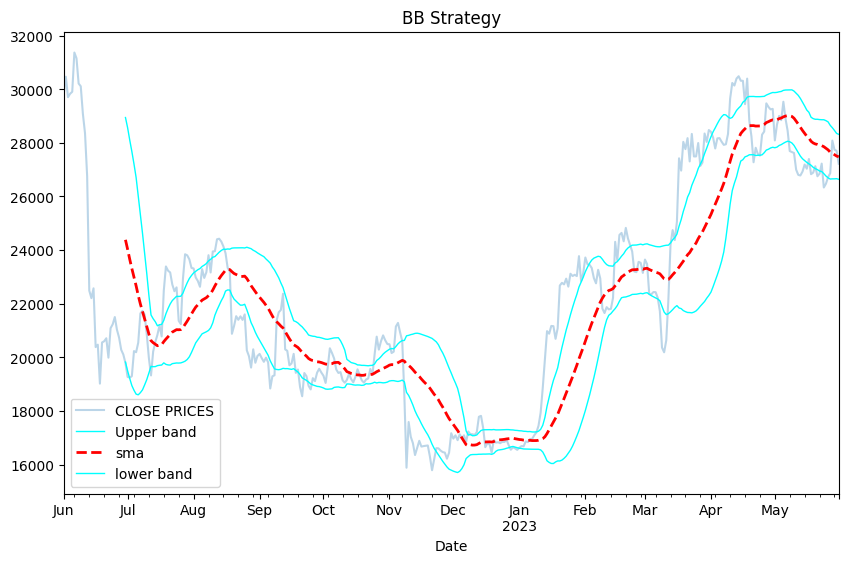

In [38]:
plt.figure(figsize=(10, 6))

close_prices.plot(label = 'CLOSE PRICES', alpha = 0.3)
(sma+sd).plot(label = 'Upper band', linewidth = 1, color = 'cyan')
sma.plot(label = 'sma', linestyle = '--', linewidth = 2, color = 'red')
(sma-sd).plot(label = 'lower band', linewidth = 1, color = 'cyan')

plt.title('BB Strategy')
plt.legend(loc = 'lower left')
plt.show()